In [15]:
# WARNING MESSAGES
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

### DIABETES 

In [17]:
# Dataset Loading
dia_df = pd.read_csv("diabetes_prediction_dataset.csv")
dia_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [18]:
# Label Encoding (for gender column)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dia_df['gender'] = le.fit_transform(dia_df['gender'])

In [19]:
#One hot encoding (for smoking_history) -- convert categorical (text) data into a numeric format
dia_df = pd.get_dummies(
    dia_df,
    columns=['smoking_history'],
    drop_first=True)

In [20]:
dia_df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0,False,False,False,False,False
99996,0,2.0,0,0,17.37,6.5,100,0,False,False,False,False,False
99997,1,66.0,0,0,27.83,5.7,155,0,False,False,True,False,False
99998,0,24.0,0,0,35.42,4.0,100,0,False,False,False,True,False


In [21]:
#Checking for null values
dia_df.isnull().sum()

gender                         0
age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64

In [22]:
dia_df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False


In [23]:
dia_df.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Converting to age group

In [24]:
def age_group(age):
    if age <= 12:
        return 'Children'
    elif age <= 19:
        return 'Teenagers'
    elif age <= 59:
        return 'Adults'
    else:
        return 'Senior Citizens'

In [31]:
#Applying age group function to the dataframe
dia_df['age_group'] = dia_df['age'].apply(age_group)

In [32]:
dia_df[['age', 'age_group']].head(10)

,age,age_group
0,80.0,Senior Citizens
1,54.0,Adults
2,28.0,Adults
3,36.0,Adults
4,76.0,Senior Citizens
5,20.0,Adults
6,44.0,Adults
7,79.0,Senior Citizens
8,42.0,Adults
9,32.0,Adults


In [ ]:
dia_df.columns

In [33]:
#Define variables X and y
X = dia_df.drop(['diabetes', 'age_group'], axis=1)
y = dia_df['diabetes']

In [34]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [35]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced')

In [36]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred = rf_model.predict(X_test)

In [39]:
#Evaluation metrices
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.96985

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
 [[18224    68]
 [  535  1173]]


In [41]:
#find and display feature importance
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False) 

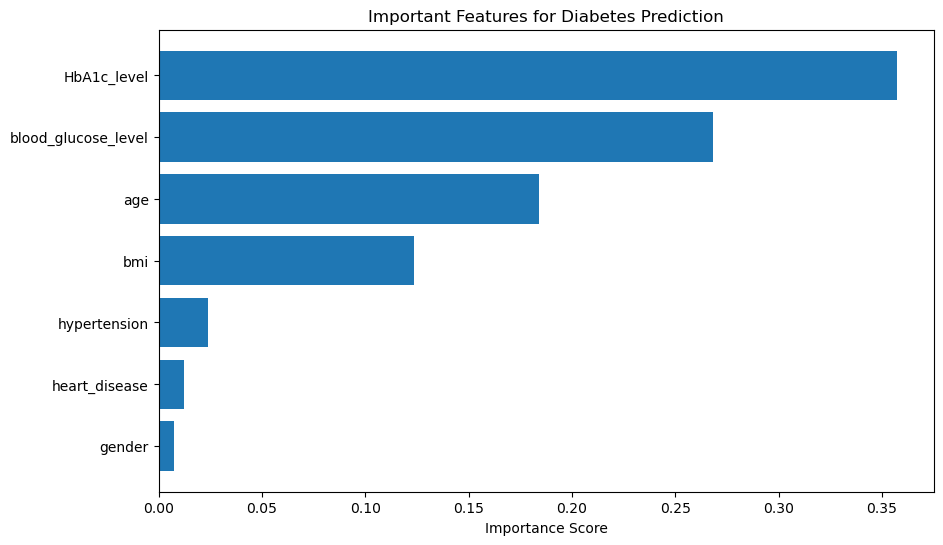

In [81]:
#Feature importance graph --- Feature importance was used to identify the most influential factors contributing to diabetes risk prediction.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'][:7],feature_importance['Importance'][:7])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Important Features for Diabetes Prediction")
plt.show()

In [45]:
test_df = X_test.copy()
test_df['predicted'] = y_pred

In [46]:
test_df['age_group'] = dia_df.loc[test_df.index, 'age_group']

In [47]:
#Age-group-wise diabetes prediction rate
age_group_risk = test_df.groupby('age_group')['predicted'].mean() * 100
age_group_risk


age_group
Adults              4.531504
Children            0.156556
Senior Citizens    14.851081
Teenagers           0.477816
Name: predicted, dtype: float64

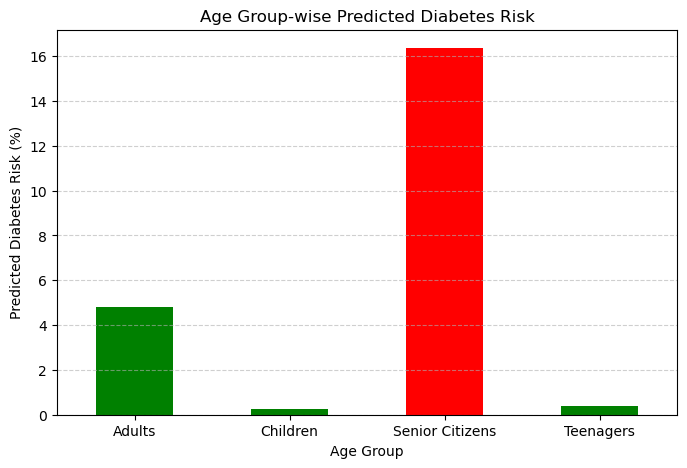

In [26]:
#Age group prediction
import matplotlib.pyplot as plt

# Define colors based on risk values
colors = []
for value in age_group_risk:
    if value < 5:
        colors.append('green')
    elif value < 15:
        colors.append('orange')
    else:
        colors.append('red')

plt.figure(figsize=(8, 5))
age_group_risk.plot(kind='bar', color=colors)

plt.ylabel("Predicted Diabetes Risk (%)")
plt.xlabel("Age Group")
plt.title("Age Group-wise Predicted Diabetes Risk")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)


### STROKE

In [48]:
# Dataset Loading
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [49]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
# Fill missing smoking_status with mode
stroke_df['smoking_status'].fillna(stroke_df['smoking_status'].mode()[0], inplace=True)

In [51]:
stroke_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [52]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [53]:
# Fill missing BMI with median
stroke_df['bmi'].fillna(stroke_df['bmi'].median(), inplace=True)

In [54]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [55]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']

for col in categorical_cols:
    stroke_df[col] = le.fit_transform(stroke_df[col])

In [56]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [57]:
stroke_df.loc[:, 'age_group'] = stroke_df['age'].apply(age_group)

In [58]:
X = stroke_df.drop(['stroke', 'age_group'], axis=1)
y = stroke_df['stroke']

In [59]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_stroke = RandomForestClassifier(n_estimators=150,random_state=42,class_weight='balanced')
rf_stroke.fit(X_train, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
#Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_stroke.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9510763209393346

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022


Confusion Matrix:
 [[972   0]
 [ 50   0]]


In [63]:
import pandas as pd
feature_importance_stroke = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_stroke.feature_importances_
}).sort_values(by='Importance', ascending=False)

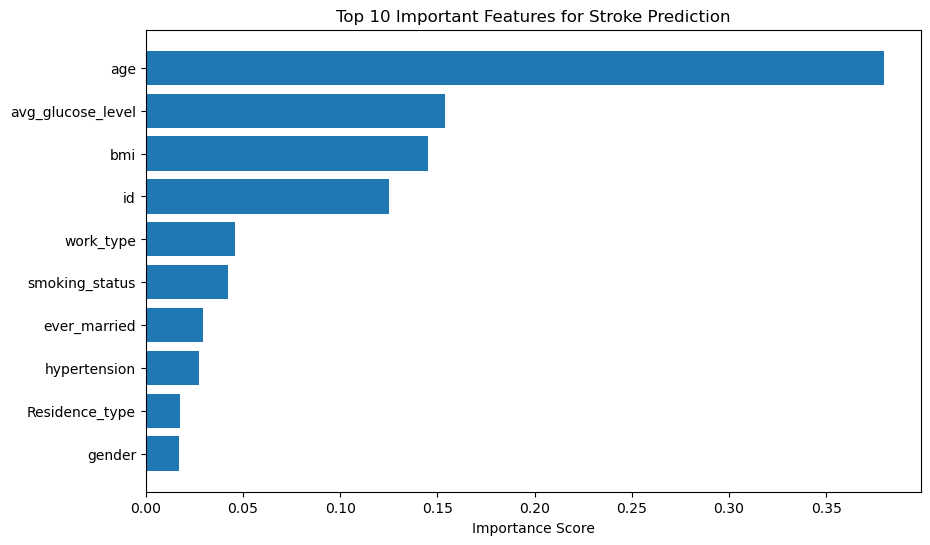

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(
    feature_importance_stroke['Feature'][:10],
    feature_importance_stroke['Importance'][:10]
)
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 10 Important Features for Stroke Prediction")
plt.show()


In [65]:
test_df = X_test.copy()
test_df['predicted'] = y_pred
test_df['age_group'] = stroke_df.loc[test_df.index, 'age_group']

In [66]:
predicted =rf_stroke.predict(X_test)

In [67]:
predicted_prob =rf_stroke.predict_proba(X_test)[:, 1]

In [68]:
test_df['predicted_prob'] = predicted_prob

age_group_risk_stroke = (test_df.groupby('age_group')['predicted_prob'].mean() * 100)
age_group_risk_stroke

age_group
Adults              2.071907
Children            0.123457
Senior Citizens    12.213235
Teenagers           0.161404
Name: predicted_prob, dtype: float64

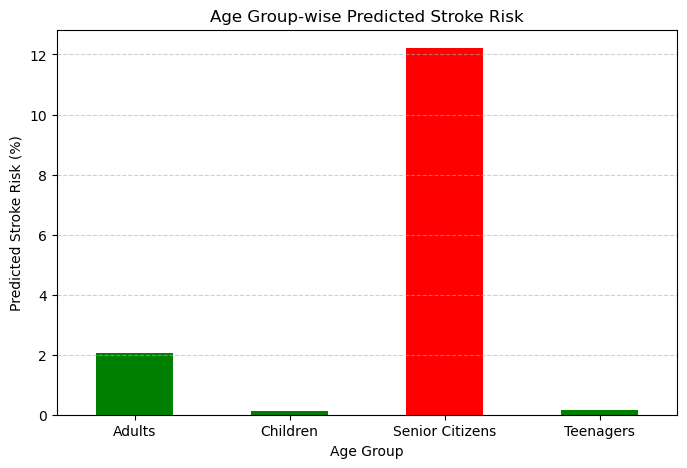

In [69]:
import matplotlib.pyplot as plt
# Assign colors based on risk
colors = []
for value in age_group_risk_stroke:
    if value < 6:
        colors.append('green')
    else:
        colors.append('red')       

plt.figure(figsize=(8, 5))
age_group_risk_stroke.plot(kind='bar', color=colors)

plt.ylabel("Predicted Stroke Risk (%)")
plt.xlabel("Age Group")
plt.title("Age Group-wise Predicted Stroke Risk")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### HEART DISEASE

In [70]:
heart_df = pd.read_csv("hypertension_data.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [71]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
heart_df.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [73]:
heart_df = heart_df.dropna(subset=['sex'])

In [74]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [75]:
heart_df.loc[:, 'age_group'] = heart_df['age'].apply(age_group)

In [76]:
#Define X and y
X_heart = heart_df.drop(['target', 'age_group'], axis=1)
y_heart = heart_df['target']

In [77]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_heart,y_heart,test_size=0.2,random_state=42)

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_heart = RandomForestClassifier(n_estimators=150,max_depth=6, min_samples_split=10,min_samples_leaf=5,random_state=42,class_weight='balanced')
rf_heart.fit(X_train, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,6
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_heart.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9633537989255564

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      2319
           1       0.95      0.99      0.97      2893

    accuracy                           0.96      5212
   macro avg       0.97      0.96      0.96      5212
weighted avg       0.96      0.96      0.96      5212


Confusion Matrix:
 [[2162  157]
 [  34 2859]]


In [80]:
#feature importance
import pandas as pd

feature_importance_hyper = pd.DataFrame({
    'Feature': X_heart.columns,
    'Importance': rf_heart.feature_importances_
}).sort_values(by='Importance', ascending=False)


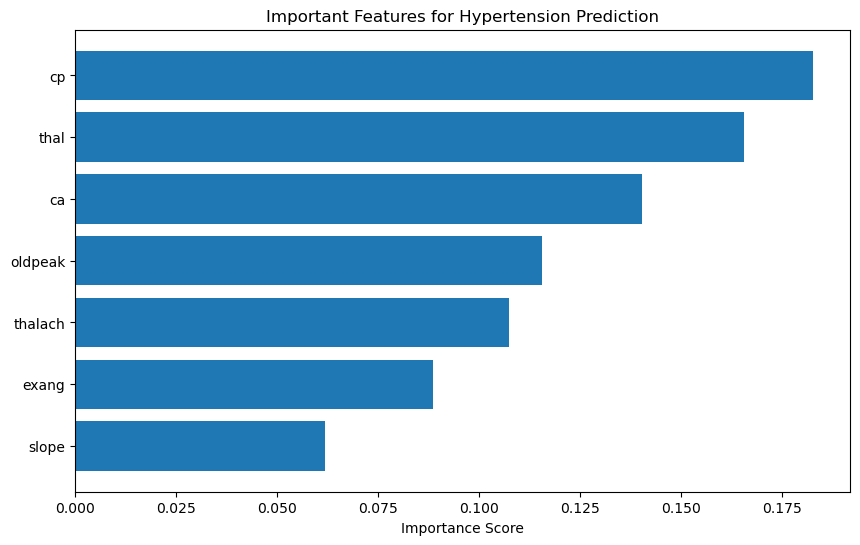

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(
    feature_importance_hyper['Feature'][:7],
    feature_importance_hyper['Importance'][:7]
)
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Important Features for Hypertension Prediction")
plt.show()


In [85]:
test_df = X_test.copy()
test_df['predicted'] = y_pred
test_df['age_group'] = heart_df.loc[test_df.index, 'age_group']

In [86]:
age_group_risk_hyper = test_df.groupby('age_group')['predicted'].mean() * 100
age_group_risk_hyper

age_group
Adults             58.507853
Senior Citizens    56.836211
Teenagers          76.923077
Name: predicted, dtype: float64

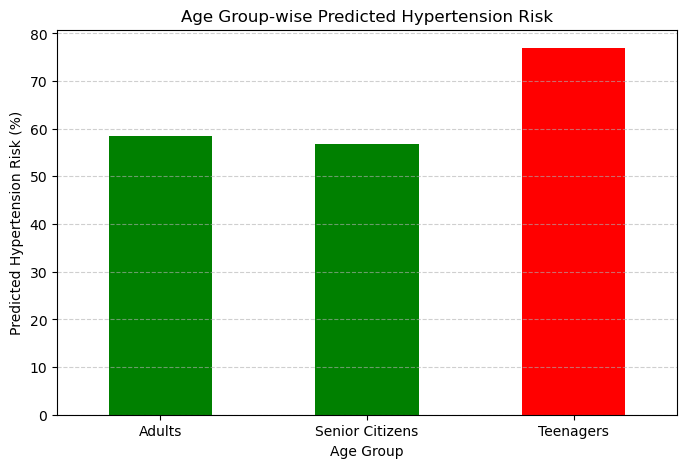

In [87]:
import matplotlib.pyplot as plt

colors = []
for value in age_group_risk_hyper:
    if value < 60:
        colors.append('green')
    else:
        colors.append('red')
plt.figure(figsize=(8,5))
age_group_risk_hyper.plot(kind='bar', color=colors)

plt.ylabel("Predicted Hypertension Risk (%)")
plt.xlabel("Age Group")
plt.title("Age Group-wise Predicted Hypertension Risk")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

### GRADIO INTERFACE

In [88]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [89]:
import numpy as np
import gradio as gr

from sklearn.ensemble import RandomForestClassifier

# ---------- DIABETES----------
X_dia_ui = dia_df[['gender', 'age', 'hypertension', 'heart_disease','bmi', 'HbA1c_level', 'blood_glucose_level']]
y_dia_ui = dia_df['diabetes']

rf_ui_diabetes = RandomForestClassifier(n_estimators=150,max_depth=6,random_state=42)
rf_ui_diabetes.fit(X_dia_ui, y_dia_ui)

# ---------- HYPERTENSION (UI MODEL) ----------
X_hyper_ui = heart_df[['age', 'sex', 'trestbps', 'chol', 'thalach']]
y_hyper_ui = heart_df['target']

rf_ui_hyper = RandomForestClassifier(n_estimators=150,max_depth=6,random_state=42)
rf_ui_hyper.fit(X_hyper_ui, y_hyper_ui)

# ---------- STROKE (UI MODEL) ----------
X_stroke_ui = stroke_df[['gender', 'age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']]
y_stroke_ui = stroke_df['stroke']

rf_ui_stroke = RandomForestClassifier(n_estimators=150,max_depth=6,random_state=42)
rf_ui_stroke.fit(X_stroke_ui, y_stroke_ui)

,n_estimators,150
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [90]:
import gradio as gr
import numpy as np

def predict_disease_ui(disease,sex, age,hypertension, heart_disease,bmi, hba1c, glucose,trestbps, chol, thalach):
    age_grp = age_group(age)
    sex_val = 1 if sex == "Male" else 0

    # -------- DIABETES --------
    if disease == "Diabetes":
        X = np.array([[sex_val, age, hypertension, heart_disease,bmi, hba1c, glucose]])
        pred = rf_ui_diabetes.predict(X)[0]
        return ("Diabetes Risk" if pred == 1 else "No Diabetes Risk",age_grp)

    # -------- STROKE --------
    elif disease == "Stroke":
        X = np.array([[sex_val, age, hypertension, heart_disease,glucose, bmi]])
        prob = rf_ui_stroke.predict_proba(X)[0][1]
        pred = 1 if prob >= 0.1 else 0  # threshold for sensitivity
        return ("Stroke Risk" if pred == 1 else "No Stroke Risk",age_grp)

    # -------- HEART DISEASE --------
    else:
        X = np.array([[age, sex_val, trestbps, chol, thalach]])
        pred = rf_ui_hyper.predict(X)[0]

        return ("Heart Disease Risk" if pred == 0 else "No Heart Disease Risk",age_grp)

In [91]:
with gr.Blocks(
    title="Lifestyle Disease Risk Prediction System",
    css="""
    .predict-btn {
        background-color: #ffcc99 !important;
        color: black !important;
        font-weight: bold;
    }
    """
) as demo:

    # ---------- CENTERED HEADING ----------
    gr.Markdown("""
    <h2 style="text-align:center;">
        🩺 Lifestyle Disease Risk Prediction System
    </h2>
    <p style="text-align:center; font-size:14px;">
    </p>
    """)

    # ---------- INPUT SECTION ----------
    disease = gr.Radio(
        ["Diabetes", "Stroke", "Heart Disease"],
        label="Select Disease"
    )
    sex = gr.Radio(
        ["Male", "Female"],
        label="Sex"
    )
    age = gr.Number(
        label="Age"
    )
    hypertension = gr.Radio(
        [0, 1],
        label="Hypertension (0 = No, 1 = Yes)"
    )
    heart_disease = gr.Radio(
        [0, 1],
        label="Heart Disease (0 = No, 1 = Yes)"
    )
    bmi = gr.Number(label="BMI")
    hba1c = gr.Number(label="HbA1c Level")
    glucose = gr.Number(label="Blood Glucose Level / Avg Glucose")

    trestbps = gr.Number(label="Resting Blood Pressure")
    chol = gr.Number(label="Cholesterol")
    thalach = gr.Number(label="Max Heart Rate")

    # ---------- PREDICT BUTTON (AFTER INPUTS) ----------
    predict_btn = gr.Button(
        "Predict",
        elem_classes=["predict-btn"]
    )

    # ---------- OUTPUT SECTION ----------
    gr.Markdown("### Prediction Output")

    out1 = gr.Textbox(
        label="Prediction",
        interactive=False
    )

    out2 = gr.Textbox(
        label="Age Group",
        interactive=False
    )

    # ---------- BUTTON ACTION ----------
    predict_btn.click(
        predict_disease_ui,
        inputs=[
            disease, sex, age,
            hypertension, heart_disease,
            bmi, hba1c, glucose,
            trestbps, chol, thalach
        ],
        outputs=[out1, out2]
    )
demo.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
